In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('продажи_2023_со_всеми_характеристиками.csv', encoding='utf-8', sep=',', low_memory=False)
pd.set_option('display.max_columns', None)
df.head(5)

,uid,name,category1_name,category2_name,category3_name,category4_name,brand_name,color,size,quantity,uid_doc,customer_key,discount_sum,total_sum,prod_unit_price,date_time_0,fill_power,r_value,baro,wireless_en,back_pocket,vent_back,vent_zip,vent_helmet,activity_type,rope_type,carab_lock_type,sling_type,warming_type,waterproof_back,sleep_bag_person,inner_short,sl_bag_collar,cloth_collar,gps,bag_valve,heart_monitor,outer_battery,height,boot_height,inner_tent_height,rub_boot_height,mat_compact_size,outer_size,tent_outer_size,water_resist,hydro_compl,depth,food_ready,breast_lock,rope_diameter,rope_length,pants_lenght,socks_lenght,sl_bag_length,sl_bag_height,bp_access,boot_rigid,back_pocket_2access,closed_toe,uf_filter,battery_type,hood,waist_pocket,shirt_pocket,bottle_pockets,filter_cat,entry_num,person_num,buckles_num,layers_num,vestibule_num,compression,sandals_const,boot_const,pants_const,hammock_const,stove_const,tent_const,helmet_const,bottle_fast,iceaxe_fast,poles_fast,helmet_fast,pants_cut,pant_boot_hook,bag_hook,main_axe_load,material_textile,poles_material,carabiner_material,membraine_type,pole_fold_type,zip,shin_zip,mosq_mesh,bottles_compl,carbide_tip,membraine,carab_lock,cape_compl,impregn,piezo,low_comf_temp,volume,surface_boot,gender,waist_belt,m_or_bay,pronation,noteb_pock_size,boot_ewlt,real_weight,back_size_modif,belt_pants,season,lacing_sys,country_origine,skeleton_remove,valve_remove,belt_remove,protect_techno,furniture_type,knife_type,scarf_type,electro_type,ballon_type,dish_type,fuel_type,carabin_type,mat_type,zip_type,boot_type,harness_type,type_of_good,stitch_type,insulation,mat_shape,sl_bag_shape,color_filter,width,sl_b_leg_width,sl_b_should_width
0,1906ff08-ddf8-11ed-85da-b42e99c9b482,Накидка на рюкзак Bach Ripstop Raincover Black,Рюкзаки,Аксессуары для рюкзаков,NaN,NaN,Bach,Black,M,1.0,6e5d358b-4333-11ee-811f-002590d0f723,201650ec-3234-11e6-80e4-002590d0f723,748.0,2242.0,2990.0,2023-08-25 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,07",NaN,NaN,23-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Накидка на рюкзак,NaN,NaN,NaN,NaN,чёрный/,NaN,NaN,NaN
1,1906ff08-ddf8-11ed-85da-b42e99c9b482,Накидка на рюкзак Bach Ripstop Raincover Black,Рюкзаки,Аксессуары для рюкзаков,NaN,NaN,Bach,Black,S,1.0,6e5d358b-4333-11ee-811f-002590d0f723,201650ec-3234-11e6-80e4-002590d0f723,748.0,2242.0,2990.0,2023-08-25 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,07",NaN,NaN,23-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Накидка на рюкзак,NaN,NaN,NaN,NaN,чёрный/,NaN,NaN,NaN
2,1906ff08-ddf8-11ed-85da-b42e99c9b482,Накидка на рюкзак Bach Ripstop Raincover Black,Рюкзаки,Аксессуары для рюкзаков,NaN,NaN,Bach,Black,XL,1.0,6e5d358b-4333-11ee-811f-002590d0f723,201650ec-3234-11e6-80e4-002590d0f723,748.0,2242.0,2990.0,2023-08-25 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,07",NaN,NaN,23-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
numcols = ['height', 'depth', 'r_value', 'rope_diameter', 'main_axe_load', 'volume', 'real_weight', 'width']
for col in numcols:
    df[col].fillna(0, inplace = True) # не работает не знаю, почему
    df[col] = df[col].str.replace(',', '.').astype(float)

In [4]:
df['depth'] = df['depth'].fillna(0)
df['inner_tent_height'] = df['inner_tent_height'].fillna(0)
df['height'] = df['height'].fillna(0)
df['r_value'] = df['r_value'].fillna(0)
df['rope_diameter'] = df['rope_diameter'].fillna(0)
df['sl_bag_length'] = df['sl_bag_length'].fillna(0)
df['sl_bag_height'] = df['sl_bag_height'].fillna(0)
df['main_axe_load'] = df['main_axe_load'].fillna(0)
df['volume'] = df['volume'].fillna(0)
df['real_weight'] = df['real_weight'].fillna(0)
df['width'] = df['width'].fillna(0)
df['sl_b_leg_width'] = df['sl_b_leg_width'].fillna(0)
df['sl_b_should_width'] = df['sl_b_should_width'].fillna(0)

In [7]:
from datetime import datetime
df['date_time_0'] = df['date_time_0'].astype("datetime64[ns]")
df = df.copy()
df['quarter'] = df['date_time_0'].dt.quarter


In [8]:
getdfeatures = ['fill_power','vent_back', 'vent_zip', 'vent_helmet', 'rope_type', 'sling_type', 'warming_type', 'waterproof_back', 'sleep_bag_person', 'inner_short', 'cloth_collar', 'boot_height', 'rub_boot_height',
                'water_resist', 'hydro_compl', 'food_ready', 'breast_lock', 'rope_length', 'pants_lenght', 'socks_lenght', 'boot_rigid', 'back_pocket_2access', 
                'closed_toe', 'hood', 'waist_pocket','bottle_pockets', 'filter_cat', 'entry_num', 'person_num', 'buckles_num', 'layers_num', 'vestibule_num', 
                'compression', 'sandals_const', 'boot_const', 'pants_const', 'hammock_const', 'stove_const', 'tent_const', 'helmet_const', 'bottle_fast', 
                'iceaxe_fast', 'poles_fast', 'helmet_fast', 'pants_cut', 'pant_boot_hook', 'bag_hook', 'poles_material', 'carabiner_material', 'membraine_type',
               'pole_fold_type', 'zip', 'shin_zip', 'mosq_mesh', 'bottles_compl', 'carbide_tip', 'membraine', 'carab_lock', 'cape_compl', 'impregn', 'piezo', 'surface_boot', 
               'gender', 'waist_belt', 'm_or_bay', 'pronation', 'noteb_pock_size', 'boot_ewlt', 'back_size_modif', 'belt_pants', 'season', 'lacing_sys', 'skeleton_remove',
               'valve_remove', 'belt_remove', 'protect_techno', 'furniture_type', 'knife_type', 'scarf_type', 'electro_type', 'ballon_type', 'dish_type', 'carabin_type',
               'mat_type', 'zip_type', 'stitch_type', 'insulation', 'mat_shape', 'sl_bag_shape', 'quarter']
              
                
for col in getdfeatures:
    df[col] = df[col].fillna(0)
df1 = pd.get_dummies(df, columns=getdfeatures)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
le.fit(df1['size'])
size_le = le.transform(df1['size'])
df1 = df1.copy()
df1['size_le'] = size_le

In [11]:
le.fit(df1['brand_name'])
brand_names_le = le.transform(df1['brand_name'])
df1 = df1.copy()
df1['brand_names_le'] = brand_names_le

In [12]:
le.fit(df1['customer_key'])
customer_keys_le = le.transform(df1['customer_key'])
df1 = df1.copy()
df1['customer_keys_le'] = customer_keys_le

In [13]:
le.fit(df1['customer_key'])
customer_keys_le = le.transform(df1['customer_key'])
df1 = df1.copy()
df1['customer_keys_le'] = customer_keys_le

In [14]:
df1.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109157 entries, 0 to 109156
Data columns (total 487 columns):
 #    Column                                        Non-Null Count   Dtype         
---   ------                                        --------------   -----         
 0    uid                                           109157 non-null  object        
 1    name                                          109157 non-null  object        
 2    category1_name                                109157 non-null  object        
 3    category2_name                                108862 non-null  object        
 4    category3_name                                74603 non-null   object        
 5    category4_name                                51327 non-null   object        
 6    brand_name                                    109046 non-null  object        
 7    color                                         109085 non-null  object        
 8    size                                      

In [15]:
df2_full = df1.iloc[:,[1,12,13,14,16,27,28,32,33,34,35,40,43,44]]
df2_data = df1.iloc[:,[12,13,14,16,27,28,32,33,34,35,40,43,44]]
df2_data.head(5)

,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight
0,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
1,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
2,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
3,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
4,6780.0,20340.0,27120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.77


In [16]:
df3 = df1.iloc[:,51:487]
df3.head(5)

,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_boot_hook_Есть,pant_boot_hook_Нет,bag_hook_0,bag_hook_Есть,bag_hook_Нет,poles_material_0,poles_material_Алюминий,poles_material_Карбон,poles_material_Композит,p

In [17]:
# вариант с суммой, скидкой и ценами
df_toteach = pd.concat([df2_data,df3], axis=1)
df_tocheck = pd.concat([df2_full,df3], axis=1)
#df_toteach.info(verbose = True, show_counts = True)

In [18]:
# Вариант масштабирования, пригодился потом в NMF так как там должны быть неотрицательные компоненты)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_toteach)
X_mimascaler = scaler.transform(df_toteach)

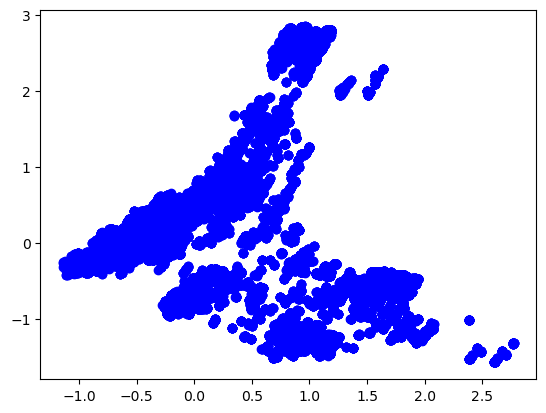

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_mimascaler)
X_PCA0 = pca.transform(X_mimascaler)
plt.plot(X_PCA0[:,0], X_PCA0[:,1],'bo')

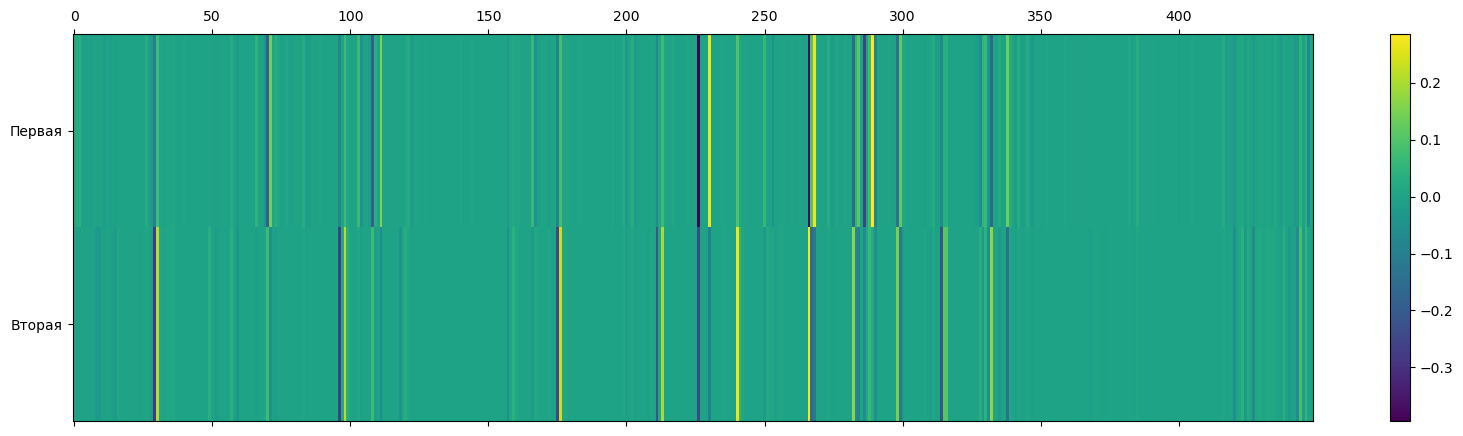

In [20]:
from matplotlib import colormaps
plt.figure(figsize = (20,5))
plt.matshow(pca.components_, cmap = 'viridis', fignum = 1, aspect = 'auto')
plt.yticks([0,1], ['Первая', 'Вторая'])
plt.colorbar()

In [21]:
# Пример про лица из книги. Берем выделяем компоненты сначала, потом делаем кластеризацию DBSCAN
from sklearn.decomposition import PCA
pcadbs = PCA(n_components = 50, whiten = True, random_state = 0)
pcadbs.fit_transform(X_mimascaler)
X_pcadbs = pcadbs.transform(X_mimascaler)

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.2, min_samples = 50)
labels = dbscan.fit_predict(X_pcadbs)
print("Уникальные метки: {}".format(np.unique(labels)))
print("размеры кластеров: {}".format(np.bincount(labels+1))) 

Уникальные метки: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25]
размеры кластеров: [106294     75     92    349    105     52    215    134     64    121
    551    139     82     55     58     57     54     75     70     81
     51     91     53     78     54     55     52]


In [23]:
df_tocheck['clusters'] = labels
df_tocheck.head(5)

,name,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_bo

In [25]:
df_inside_cluster = df_tocheck.loc[(df_tocheck['clusters'] == 3)]
df_inside_cluster.head(20)

,name,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_bo

In [26]:
def analyzePCA(X, pca, explained_threshold=0.95):
    """Plot cumulative explaned variance of PCA"""
    pca.fit(X)
    pca_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(15,7))
    plt.plot(np.cumsum(pca_variance))
    plt.hlines(explained_threshold, 0, len(pca_variance))
    plt.title("Number of components to explain {}% of variance: {}".format(
        100*explained_threshold, np.argwhere(np.cumsum(pca_variance)>0.95)[0]
    ))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

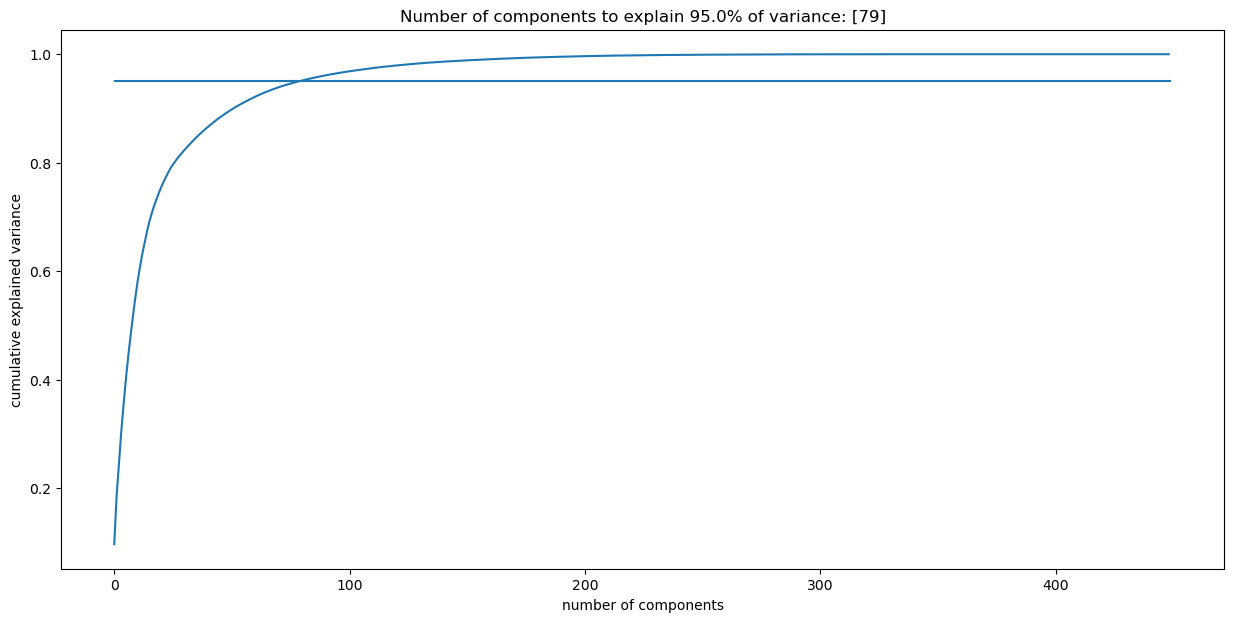

In [27]:
pca = PCA()
analyzePCA(X_mimascaler, pca)

In [28]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_stdscaled = stdscaler.fit_transform(df_toteach)

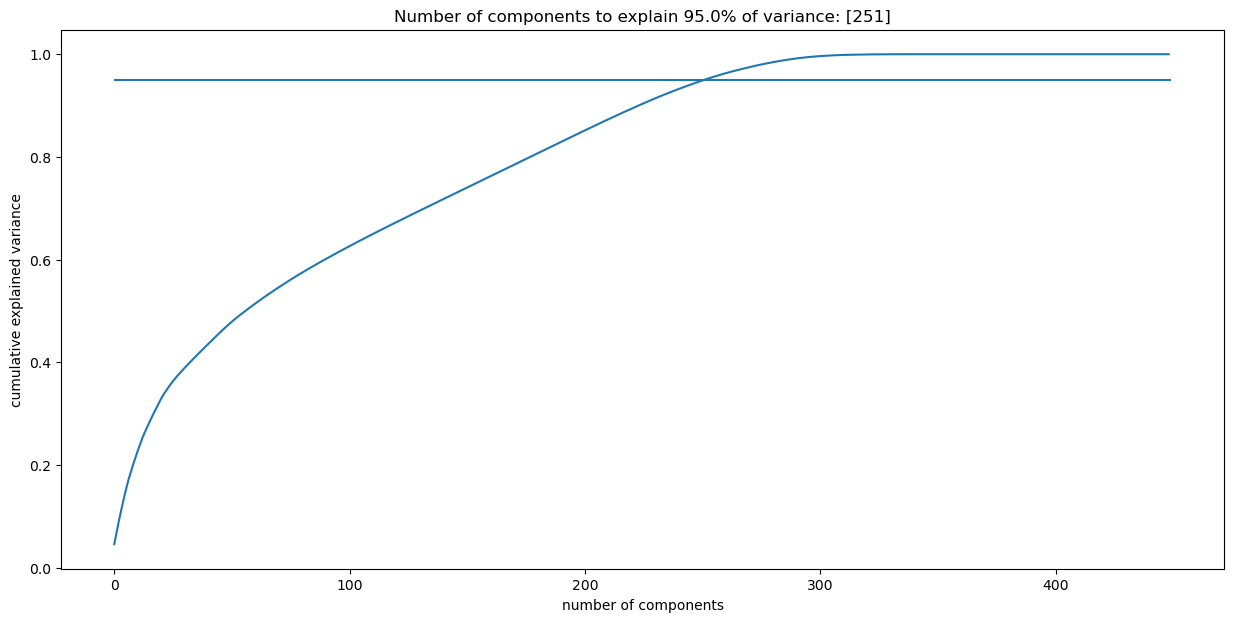

In [29]:
pca = PCA()
analyzePCA(X_stdscaled, pca)